# Data visualization project
## Ford GoBike analisys and visualization
<span style="color:lightslategray;font-size:12px;">By Andrés Pozuelo, May-2019</span>
## Index
- [What is Ford GoBike?](#whatis)
- [Gathering data and Create a dataset](#create)
- [Assessing Data](#asse)
- [Cleaning Data](#clean)
- [Part IV - Univariate Exploration](#univariate)
- [Part V - Bivariate Exploration](#bivariate)
- [Part VI - Multivariate Exploration](#multivariate)

### What is Ford GoBike? <a id='whatis'></a>
Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Gathering data and Create a dataset<a id='create'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import os
import glob

%matplotlib inline

In [2]:
all_files = glob.glob(os.path.join('csv\*.csv'))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)
df.to_csv('gobike.csv', index=False)

#### Original structure
This first dataset has more than 2.7 million records in 16 columns and includes records from 2018-01-01 to 2019-09-30.

In [3]:
print(df['start_time'].min())
print(df['start_time'].max())
print(df.shape)
print(df.dtypes)

2018-01-01 00:01:53.8470
2019-04-30 23:59:04.7390
(2734625, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


### Assessing data<a id='asse'></a>

In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
920888,242,2018-07-16 19:54:37.3110,2018-07-16 19:58:40.1800,338.0,13th St at Franklin St,37.803189,-122.270579,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,1546,Subscriber,1980.0,Female,No
2309808,739,2019-03-23 14:23:51.3910,2019-03-23 14:36:11.0690,26.0,1st St at Folsom St,37.787290,-122.394380,345.0,Hubbell St at 16th St,37.766483,-122.398279,5818,Subscriber,1989.0,Female,No
2725251,244,2019-04-01 21:00:56.4590,2019-04-01 21:05:01.1070,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,265.0,Ninth St at Parker St,37.858868,-122.291209,6684,Subscriber,1982.0,Male,No
572445,295,2018-05-09 17:41:24.1130,2018-05-09 17:46:19.8060,203.0,Webster St at 2nd St,37.795195,-122.273970,162.0,Franklin St at 9th St,37.800516,-122.272080,3515,Subscriber,1984.0,Male,No
1090724,384,2018-08-20 17:04:57.8540,2018-08-20 17:11:22.0750,NaN,NaN,37.400000,-121.920000,NaN,NaN,37.390000,-121.930000,4183,Subscriber,1994.0,Male,Yes
2139568,2093,2019-02-17 20:12:18.9320,2019-02-17 20:47:12.1430,146.0,30th St at San Jose Ave,37.742314,-122.423180,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,5271,Subscriber,1991.0,Male,No
1367807,420,2018-09-06 16:20:58.7100,2018-09-06 16:27:59.1130,90.0,Townsend St at 7th St,37.771058,-122.402717,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,3610,Subscriber,1980.0,Male,No
88707,73555,2018-01-02 15:47:49.2470,2018-01-03 12:13:44.9850,84.0,Duboce Park,37.769201,-122.433812,70.0,Central Ave at Fell St,37.773311,-122.444293,2201,Customer,NaN,NaN,No
592520,946,2018-05-06 12:25:37.9860,2018-05-06 12:41:24.2770,283.0,Delmas Ave and San Fernando St,37.330264,-121.897702,280.0,San Fernando at 7th St,37.337246,-121.883074,2225,Subscriber,1984.0,Male,Yes
1424032,2326,2018-10-27 14:08:57.4220,2018-10-27 14:47:44.1500,124.0,19th St at Florida St,37.760447,-122.410807,124.0,19th St at Florida St,37.760447,-122.410807,4331,Subscriber,1993.0,Male,No


In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
duration_sec               2734625 non-null int64
start_time                 2734625 non-null object
end_time                   2734625 non-null object
start_station_id           2722124 non-null float64
start_station_name         2722124 non-null object
start_station_latitude     2734625 non-null float64
start_station_longitude    2734625 non-null float64
end_station_id             2722124 non-null float64
end_station_name           2722124 non-null object
end_station_latitude       2734625 non-null float64
end_station_longitude      2734625 non-null float64
bike_id                    2734625 non-null int64
user_type                  2734625 non-null object
member_birth_year          2583000 non-null float64
member_gender              2583354 non-null object
bike_share_for_all_trip    2734625 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 333.8+ MB


In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# It is not possible so elderly users
print(df['member_birth_year'].min())
print(df['member_birth_year'].max())

1878.0
2001.0


**Quality issues**
 * It is not possible so elderly users
 * The start_time and end_time fields must be of the timestamp type
 * The user_type, member_gender and bike_share_for_all_trip field can be of the category type
 * Añadir columnas de año, mes, día, semana y hora

### Cleaning Data<a id='clean'></a>

In [19]:
# Copy data
df_clean = df.copy()

#### Calculation of age and discarding users over 80 years

In [21]:
# create age field
df_clean['age'] = 2019-df_clean['member_birth_year']

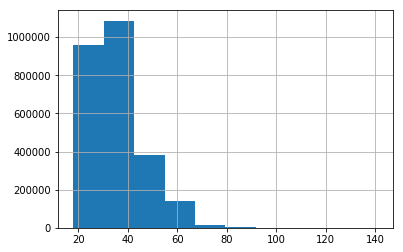

In [22]:
df_clean['age'].hist();

In [23]:
# Discarding users over 80 years and null values
df_clean = df_clean.query('age <= 80')

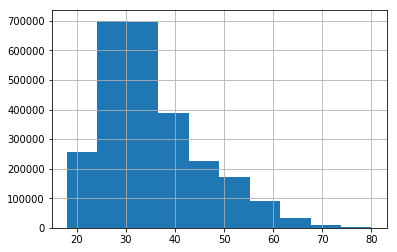

In [24]:
df_clean['age'].hist();

#### Change to timestamp type

In [25]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [26]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
age                               float64
dtype: object

#### Can be of the category type

In [27]:
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [28]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                               float64
dtype: object

#### Add columns for year, month, week, day and hour

In [36]:
# Create columns
df_clean['year']=df_clean['start_time'].dt.year.astype(int)
df_clean['month']=df_clean['start_time'].dt.month.astype(int)
df_clean['week']=df_clean['start_time'].dt.strftime('%a')
df_clean['day']=df_clean['start_time'].dt.day.astype(int)
df_clean['hour']=df_clean['start_time'].dt.hour

In [37]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579666 entries, 0 to 2734624
Data columns (total 22 columns):
duration_sec               2579666 non-null int64
start_time                 2579666 non-null datetime64[ns]
end_time                   2579666 non-null datetime64[ns]
start_station_id           2567499 non-null float64
start_station_name         2567499 non-null object
start_station_latitude     2579666 non-null float64
start_station_longitude    2579666 non-null float64
end_station_id             2567499 non-null float64
end_station_name           2567499 non-null object
end_station_latitude       2579666 non-null float64
end_station_longitude      2579666 non-null float64
bike_id                    2579666 non-null int64
user_type                  2579666 non-null category
member_birth_year          2579666 non-null float64
member_gender              2579666 non-null category
bike_share_for_all_trip    2579666 non-null category
age                        2579666 non-null 

#### Save the clean-master dataset

In [38]:
df_clean.to_csv('clean_master_gobike.csv', index=False)

### What is the structure of your dataset?
The final structure has more than 2.5 million records in 21 columns where we can see:
- The times of the journeys
- From where and where with geolocation
- Age, gender and type of user
- The id of the bicycle and if it is shared for the all trip.

In addition columns of **year, week, month, day and hour** have been added for a better subsequent analysis

In [40]:
print(df_clean['start_time'].min())
print(df_clean['start_time'].max())
print(df_clean.shape)
print(df_clean.dtypes)

2018-01-01 00:07:41.040000
2019-04-30 23:59:04.739000
(2579666, 22)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                               float64
year                                int32
month                               int32
day                                 int32
hour                                int64
week                               object
dtype: o

### What is/are the main feature(s) of interest in your dataset?

- Estoy interesado en descubrir el uso de GoBike por edades y género.
- Cuáles son las horas punta, los días de la semana mayor demanda y si afectan los meses con temperaturas mas bajas.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!